In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Membaca dataset
data = pd.read_csv('katalog_gempa.csv')

Pembersihan Data
Yang Dilakukan:
1. Menghapus data duplikat
2. Menangani nilai yang hilang

In [ ]:
# Menampilkan 5 baris pertama
print("5 Baris Pertama Dataset:")
display(data.head())

# Informasi umum dataset
print("\nInformasi Umum Dataset:")
data.info()

# Memeriksa nilai yang hilang
print("\nJumlah Nilai yang Hilang:")
print(data.isnull().sum())

In [25]:
# Menghapus data duplikat
df_csv = data.drop_duplicates()

In [ ]:
def add_random_missing_values(dataframe: pd.DataFrame, missing_rate: float = 0.05) -> pd.DataFrame:  
    df_missing = dataframe.copy()  # Membuat salinan dataset asli
    df_size = dataframe.size  # Ukuran total dataset
    num_missing = int(df_size * missing_rate)  # Menghitung jumlah nilai kosong yang akan ditambahkan

    for _ in range(num_missing):  
        row_idx = random.randint(0, dataframe.shape[0] - 1)  # Pilih baris secara acak
        col_idx = random.randint(0, dataframe.shape[1] - 1)  # Pilih kolom secara acak
        df_missing.iat[row_idx, col_idx] = np.nan  # Tambahkan nilai kosong (NaN) pada sel yang dipilih

    return df_missing  # Mengembalikan dataset dengan nilai kosong yang ditambahkan

# Menambahkan nilai kosong ke dataset
data = add_random_missing_values(data, missing_rate=0.05)  

print("\nSetelah Menambahkan Nilai Kosong:")
print(data.isnull().sum())  # Memeriksa nilai kosong


In [ ]:
data_filled = data.copy()  # Membuat salinan dataset
numeric_cols = data.select_dtypes(include=["float64", "int64"]).columns  # Memilih kolom numerik
data_filled[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())  # Mengisi nilai kosong dengan rata-rata

print("\nSetelah Mengisi Nilai Kosong:")
print(data_filled.isnull().sum())  # Memeriksa nilai kosong


Analisis Tren Data
Tren Data yang dianalisis:
1. Korelasi antara magnitudo dan kedalaman gempa
2. Total kasus tahunan
3. Tingkat frekuensi gempa Berdasarkan Magnitudo
4. Tren Gempa Berdasarkan Wilayah
5. Distribusi Geografis Gempa
6. Distribusi Kedalaman Gempa
7. Modus, Median dan Standar Deviasi Gempa

In [ ]:
# 1 Korelasi antara magnitudo dan kedalaman
mag_depth_correlation = data[['mag', 'depth']].corr().iloc[0, 1]

print("Korelasi antara Magnitudo dan Kedalaman:")
print(f"Korelasi: {mag_depth_correlation:.2f}")

In [ ]:
# 2. Total Kasus Tahunan
data['tgl'] = pd.to_datetime(data['tgl'], errors='coerce')
data = data.dropna(subset=['tgl'])
data['year'] = data['tgl'].dt.year
total_kasus_tahunan = data.groupby('year').size().reset_index(name='total_cases')

print("\nTotal Kasus Tahunan:")
display(total_kasus_tahunan)


In [ ]:
# 3. Tingkat Frekuensi Gempa Berdasarkan Magnitudo
bins = [0, 3, 4, 5, 6, 7, 8, 10]
labels = ['<3', '3-4', '4-5', '5-6', '6-7', '7-8', '>8']
data['magnitude_range'] = pd.cut(data['mag'], bins=bins, labels=labels, include_lowest=True)
frekuensi_gempa = data['magnitude_range'].value_counts().reset_index()
frekuensi_gempa.columns = ['magnitude_range', 'frequency']
frekuensi_gempa = frekuensi_gempa.sort_values('magnitude_range')

print("\nTingkat Frekuensi Gempa Berdasarkan Magnitudo:")
display(frekuensi_gempa)


In [ ]:
# 4 Tren Gempa Berdasarkan Wilayah
regional_trend = data['remark'].value_counts().reset_index()
regional_trend.columns = ['Wilayah', 'Jumlah Gempa']

print("Jumlah Gempa Berdasarkan Wilayah:")
display(regional_trend)


In [ ]:
# 5 Distribusi Geografis Gempa
data['geo_zone'] = pd.cut(data['lat'], bins=5).astype(str) + " | " + pd.cut(data['lon'], bins=5).astype(str)
geo_distribution = data['geo_zone'].value_counts().reset_index()
geo_distribution.columns = ['Zona Geografis', 'Jumlah Gempa']

print("Distribusi Geografis Gempa:")
display(geo_distribution)


In [ ]:
# 6 Kategorikan kedalaman gempa
# Membuat kategori kedalaman
bins = [0, 50, 300, data['depth'].max()]
labels = ['Dangkal (<50 km)', 'Sedang (50-300 km)', 'Dalam (>300 km)']
data['depth_category'] = pd.cut(data['depth'], bins=bins, labels=labels, include_lowest=True)
depth_distribution = data['depth_category'].value_counts().reset_index()
depth_distribution.columns = ['Kategori Kedalaman', 'Jumlah Gempa']

print("\nDistribusi Kedalaman Gempa:")
display(depth_distribution)


In [ ]:
# 7 Modus, Median dan Standar Deviasi Gempa
statistik_tren = []
for column in data_filled.select_dtypes(include=["float64", "int64"]).columns:
    statistik_tren.append({
        "Kolom": column,
        "Standar Deviasi": data_filled[column].std(),
        "Modus": data_filled[column].mode()[0],
        "Median": data_filled[column].median()
    })

tren_df = pd.DataFrame(statistik_tren)

print("\nTren Statistik Deskriptif:")
display(tren_df)


Visualisasi Data
Visualisasi yang dibuat:
1. Heatmap
2. Grafik Garis
3. Grafik Batang

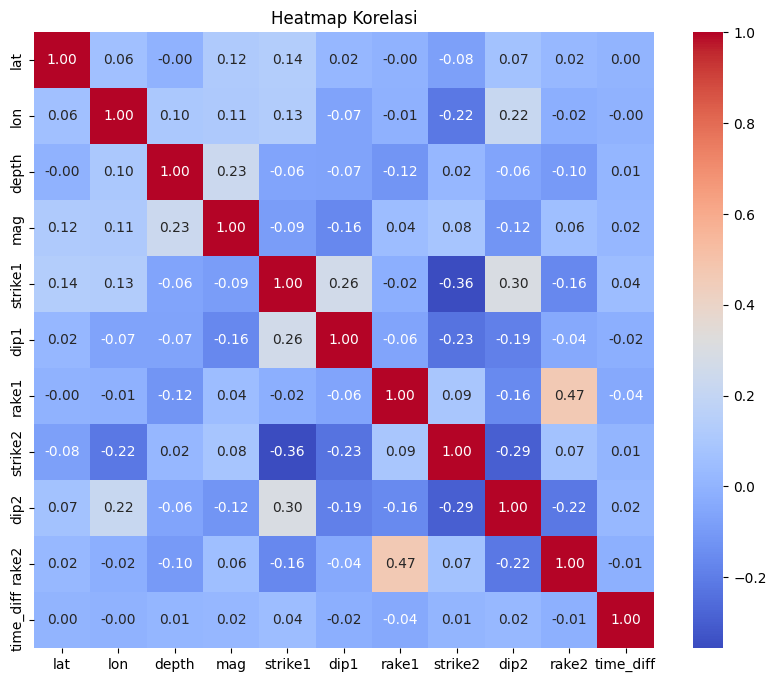

In [55]:
# Heatmap Korelasi Data

numeric_data = data.select_dtypes(include=["float64", "int64"])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f") 
plt.title("Heatmap Korelasi")
plt.show()


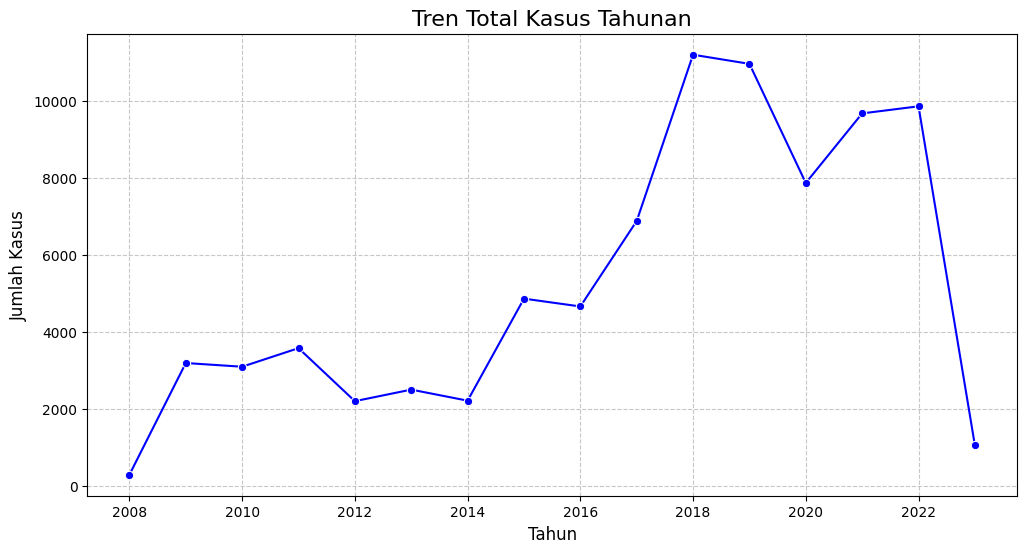

In [43]:
# Grafik Garis Total Kasus Tahunan

plt.figure(figsize=(12, 6))
sns.lineplot(x=total_kasus_tahunan['year'], y=total_kasus_tahunan['total_cases'], marker='o', color='blue')
plt.title('Tren Total Kasus Tahunan', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Kasus', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()


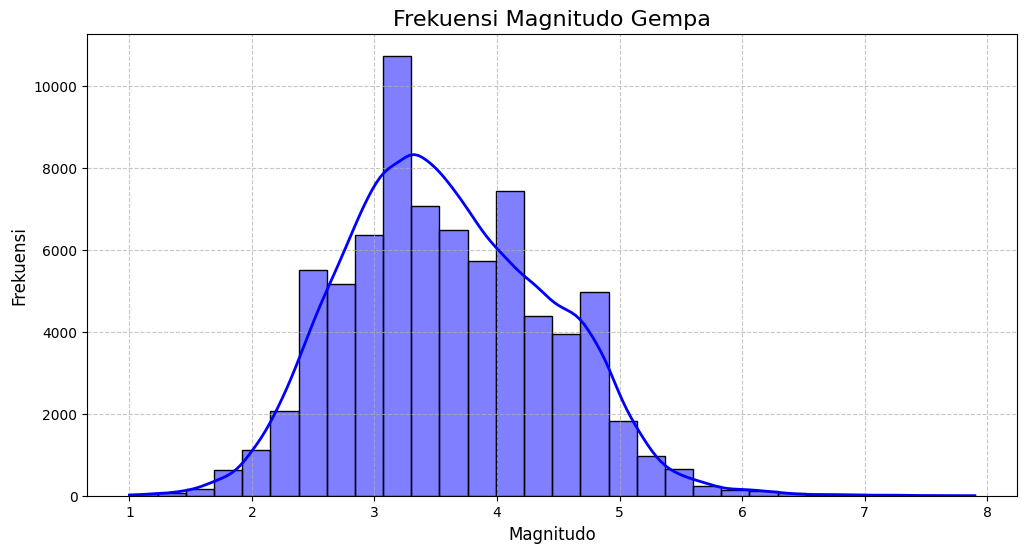

In [54]:
# Grafik Batang Frekuensi Magnitudo

plt.figure(figsize=(12, 6))
sns.histplot(data['mag'], kde=True, color='blue', bins=30, line_kws={'color': 'black', 'linewidth': 2})
plt.title("Frekuensi Magnitudo Gempa", fontsize=16)
plt.xlabel("Magnitudo", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)

plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()



C:\Users\Rasmakel\AppData\Local\Temp\ipykernel_16396\613374151.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


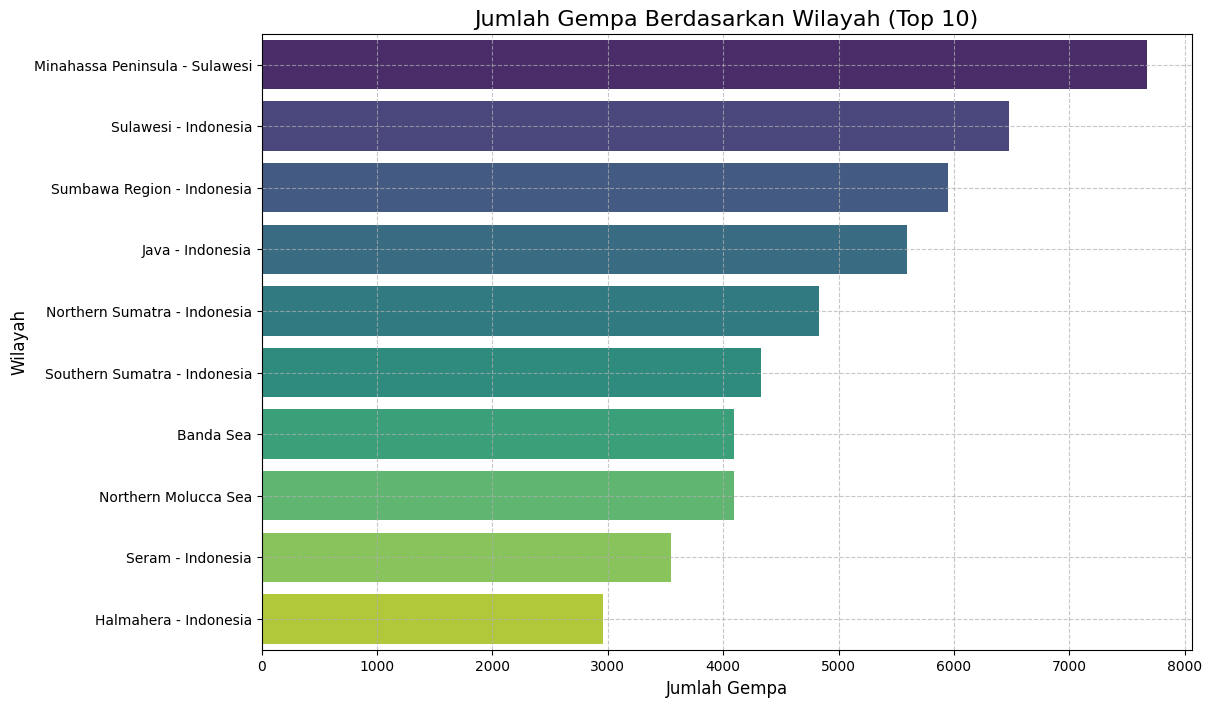

In [45]:
# Grafik Batang Trend Wilayah Gempa

plt.figure(figsize=(12, 8))
sns.barplot(
    x=regional_trend['Jumlah Gempa'].head(10),  # Menampilkan 10 wilayah teratas
    y=regional_trend['Wilayah'].head(10),
    palette='viridis'
)
plt.title('Jumlah Gempa Berdasarkan Wilayah (Top 10)', fontsize=16)
plt.xlabel('Jumlah Gempa', fontsize=12)
plt.ylabel('Wilayah', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()


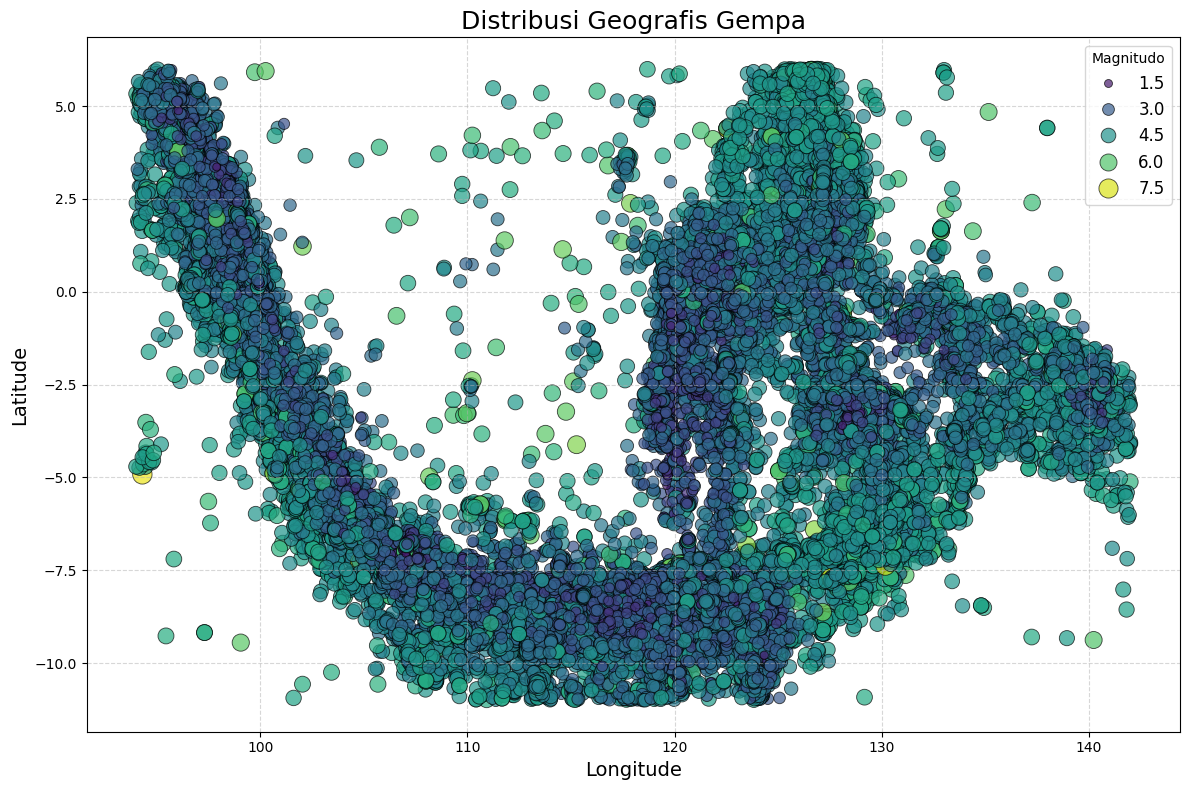

In [50]:
# Grafik Disribusi Geografis Gempa

plt.figure(figsize=(12, 8))

sns.scatterplot(
    x=data['lon'], 
    y=data['lat'], 
    hue=data['mag'],
    size=data['mag'],
    sizes=(20, 200),
    palette='viridis',
    marker='o', 
    edgecolor='black',
    alpha=0.7
)

plt.title("Distribusi Geografis Gempa", fontsize=18)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.legend(title='Magnitudo', loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



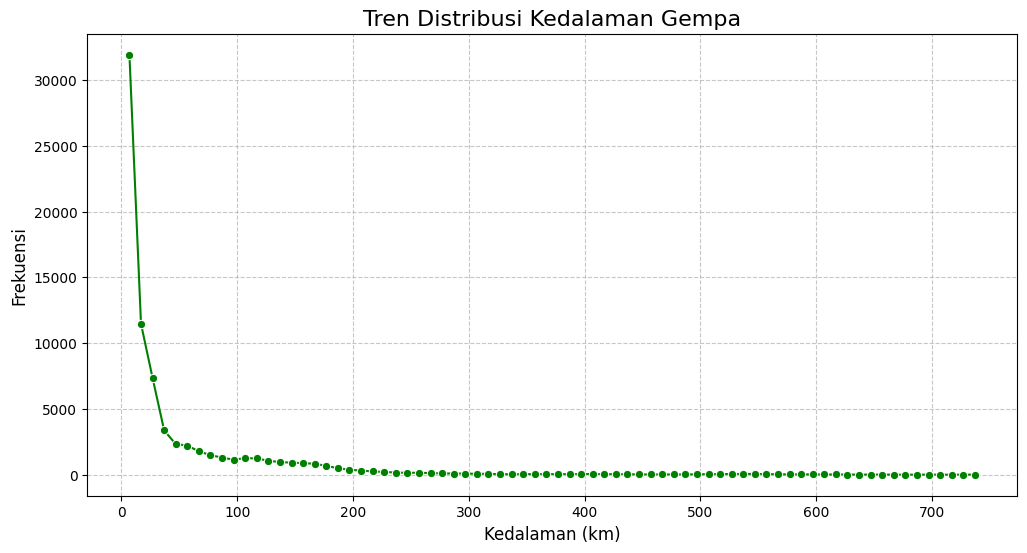

In [52]:
# Grafik Garis Distribusi Kedalaman Gempa

depth_bins = np.arange(data['depth'].min(), data['depth'].max(), 10)  # Membagi kedalaman dalam interval 10 km
depth_counts, depth_edges = np.histogram(data['depth'], bins=depth_bins)

depth_trend = pd.DataFrame({
    'Depth (km)': (depth_edges[:-1] + depth_edges[1:]) / 2,  # Titik tengah bin kedalaman
    'Frequency': depth_counts
})

plt.figure(figsize=(12, 6))
sns.lineplot(x=depth_trend['Depth (km)'], y=depth_trend['Frequency'], marker='o', color='green')
plt.title('Tren Distribusi Kedalaman Gempa', fontsize=16)
plt.xlabel('Kedalaman (km)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()

